**Enrique Santos Fraire, 25/11/2022**

# Introducción

Utilizando el dataset del bloque anterior se realizó lo siguiente:


1.- Realiza un análisis exploratorio de las variables:

Calcula matriz de varianza y covarianza, así como matriz de correlación de las variables independientes y la dependiente. Explicar qué es la varianza, covarianza y correlación. Interpreta la matriz de correlación. Tiene que utilizar álgebra matricial y corroborar resultados con funciones de Python.

Corre pruebas estadísticas para detectar outliers y leverage points. Tiene que utilizar álgebra matricial para las pruebas y explicar claramente cómo funcionan las pruebas. Puede utilizar funciones de Python para corroborar resultados.

2.- Hace un análisis de multicolinealidad explicando la prueba e implicaciones en el modelo.

3.- Propone e implementa soluciones a los problemas de los puntos anteriores para que el modelo sea el más adecuado.

4.-Estima e interpreta un modelo de regresión múltiple después de atender los problemas anteriores. Tiene que utilizar álgebra matricial para estimar coeficientes y errores estándar del modelo de regresión, y utilizar funciones de Python para corroborar resultados.


# CARGA Y LIMPIEZA DE DATOS

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/Semestre IA 2/Estadística Avanzada para la Ciencia de Datos"
!ls  # show current directory

/content/gdrive/MyDrive/Semestre IA 2/Estadística Avanzada para la Ciencia de Datos
'Evaluación de un modelo y su aplicación para predicción.ipynb'
 IGAE.csv
'Preprocesamiento y análisis de datos multivariados.ipynb'
 us2022q2a.csv
 usfirms2022.csv


IMPORTACIÓN DE LIBRERÍAS

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

df1 = pd.read_csv('us2022q2a.csv')
df2 = pd.read_csv('usfirms2022.csv')

DROPEAMOS LOS DATOS QUE NO APORTAN INFORMACIÓN AL MODELO, FISCALMONTH, YEAR Y CTO YA ESTAN EN Q. COUNTRY OF ORIGIN Y ASSET ES INFORMACIÓN QUE NO CAMBIA.

In [4]:
df1 = df1.drop(['fiscalmonth', 'year', 'cto'], axis=1)
df2 = df2.drop(['N', 'Country\nof Origin', 'Type of Asset'], axis=1)

UNIMOS AMBOS DATA FRAMES.

In [5]:
df_merge = df1.merge(df2, left_on='firm', right_on='Ticker')
df_merge

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,originalprice,sharesoutstanding,Ticker,Name,Class,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0000,452000.000,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,73.7500,452271.967,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,48.9375,453014.579,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,54.7500,456366.381,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,30.7300,456769.737,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,5.2900,41251.537,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
323812,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,4.2400,41251.537,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
323813,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,2.8800,41217.537,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-
323814,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,2.0500,42447.037,ZYNE,"Zynerba Pharmaceuticals, Inc",Com,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


ASIGNAMOS EN MULTI-INDEX

In [6]:
df_merge['qdate'] = pd.PeriodIndex(df_merge['q'], freq="Q")

df_merge.set_index(['firm', 'qdate'], inplace = True)

OBTENEMOS EL ÚLTIMO PRECIO ANUAL Y LOS RETORNOS COMPUESTOS

In [7]:
df_merge['R'] = np.log(df_merge.groupby(['firm'])['adjprice'].shift(-1)) - np.log(df_merge.groupby(['firm'])['adjprice'].shift(3))

GUARDAMOS UN COPIA DEL DATAFRAME

In [8]:
df_copy = df_merge.copy()

# DATOS ESTADÍSTICOS Y LIMPIEZA

DROPEAMOS LOS SECTORES QUE NO NECESITAMOS

In [9]:
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == '-')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Agriculture, Forestry, Fishing and Hunting')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Arts, Entertainment, and Recreation')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Construction')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Finance and Insurance')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Health Care and Social Assistance')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Information')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Manufacturing')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Mining, Quarrying, and Oil and Gas Extraction')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Real Estate and Rental and Leasing')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Retail Trade')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Transportation and Warehousing')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Utilities')].index)
df_copy = df_copy.drop(df_copy[(df_copy['Sector NAICS\nlevel 1'] == 'Wholesale Trade')].index)

CONSERVAMOS LOS DATOS DEL PRIMER CUARTO DEL 2022, EL MÁS RECIENTE.

In [10]:
mask = df_copy['q'] == '2022q1'
df_mask = df_copy[mask]
df_services = df_mask.copy()

PARA EVITAR PROBLEMAS CON LOS RATIOS SE CAMBIAN LOS CEROS POR NAN'S PARA QUE NO AFECTE A LOS DENOMINADORES.

In [11]:
df_services['revenue'].replace(0, np.nan, inplace=True)

SE CREAN LAS COLUMNAS DE DATOS ESTADÍSTICOS QUE NOS AYUDARÁN A RESOLVER LOS PROBLEMAS.

In [12]:
# Firm Size Measures
df_services['Book'] = df_services['totalassets'] - df_services['totalliabilities']
df_services['Market'] = df_services['originalprice'] * df_services['sharesoutstanding']

# Profit Margin Measures
df_services['EBIT'] = df_services['revenue'] - df_services['cogs'] - df_services['sgae'] - df_services['otheropexp']
df_services['Net Income'] = df_services['EBIT'] + df_services['extraincome']- df_services['incometax'] - df_services['finexp']
df_services['Earnings Per Share (EPS)'] = df_services['Net Income'] / df_services['sharesoutstanding']

# Se eligen los 3 márgenes para el análisis estadístico
df_services['EPSP (deflated by price)'] = df_services['Earnings Per Share (EPS)'] / df_services['originalprice']
df_services['Operating Profit Margin (OPM)'] = df_services['EBIT'] / df_services['revenue']
df_services['Book-to-Market ratio'] = df_services['Book'] / df_services['Market']

In [13]:
df_services.dropna(subset=["Market"], how="all", inplace=True)

VARIABLES DUUMIES DEL TAMAÑO PARA OBTENER LAS EMPRESAS PEQUEÑAS, MEDIANAS Y GRANDES.

In [14]:
def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

df_services["pct"]=df_services.groupby('q')['Market'].apply(dense_inclusive_pct).astype(int)

df_services["isSmall"] = df_services.pct <= 33
df_services["isSmall"] = df_services["isSmall"].astype(int)

df_services["isMedium"] = (df_services.pct <= 66) & (df_services.pct > 33) 
df_services["isMedium"] = df_services["isMedium"].astype(int)

In [15]:
len(df_services)

375

In [16]:
df_services.head(10)

,,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,Market,EBIT,Net Income,Earnings Per Share (EPS),EPSP (deflated by price),Operating Profit Margin (OPM),Book-to-Market ratio,pct,isSmall,isMedium
firm,qdate,,,,,,,,,,,,,,,,,,,,,
ABM,2022Q1,2022q1,1936200.0,1659600.0,170600.0,0.0,500.0,6200.0,24300.0,4504900.0,2849600.0,...,3.078651e+06,106000.0,76000.0,1.136550,0.024686,0.054746,0.537670,61,0,1
ABNB,2022Q1,2022q1,1508937.0,362623.0,918116.0,233329.0,-1935.0,1020.0,10706.0,17068442.0,12331026.0,...,1.088397e+08,-5131.0,-18792.0,-0.029656,-0.000173,-0.003400,0.043527,98,0,0
ABSI,2022Q1,2022q1,819.0,0.0,29622.0,0.0,125.0,195.0,621.0,395460.0,54964.0,...,7.820738e+05,-28803.0,-29494.0,-0.317917,-0.037713,-35.168498,0.435376,36,0,1
ACCD,2022Q1,2022q1,93756.0,43593.0,87109.0,-7134.0,-114.0,768.0,3862.0,1285529.0,429735.0,...,1.175789e+06,-29812.0,-34556.0,-0.516082,-0.029390,-0.317974,0.727846,42,0,1
ACM,2022Q1,2022q1,3213658.0,3003706.0,37098.0,73292.0,2179.0,24173.0,36011.0,11196063.0,8546410.0,...,1.085654e+07,99562.0,41557.0,0.294016,0.003828,0.030981,0.244061,82,0,0
ACVA,2022Q1,2022q1,103065.0,60888.0,38437.0,32829.0,44.0,210.0,240.0,1019344.0,485722.0,...,2.314308e+06,-29089.0,-29495.0,-0.188748,-0.012745,-0.282239,0.230575,54,0,1
ADT,2022Q1,2022q1,1544747.0,509768.0,958471.0,528.0,1496.0,6307.0,19524.0,17014781.0,13734514.0,...,5.821701e+06,75980.0,51645.0,0.067332,0.008871,0.049186,0.563455,74,0,0
AGTI,2022Q1,2022q1,294444.0,170817.0,86138.0,0.0,-28.0,10664.0,6905.0,2487261.0,1561243.0,...,2.766654e+06,37489.0,19892.0,0.151707,0.007190,0.127321,0.334707,59,0,1
AGYS,2022Q1,2022q1,46558.0,18866.0,25152.0,995.0,198.0,-7.0,-232.0,214162.0,116818.0,...,9.856076e+05,1545.0,1982.0,0.080196,0.002011,0.033184,0.098765,40,0,1


# Matrices

RENOMBRAMOS COLUMNAS PARA TRABAJAR MÁS FACILMENTE CON ELLAS

In [17]:
df_services.rename(columns = {'EPSP (deflated by price)':'EPSP', 'Operating Profit Margin (OPM)':'OPM', 'Book-to-Market ratio':'BtMr'}, inplace = True)
df_services = df_services.reset_index()

ASIGNAMOS LAS X'S Y LAS Y'S

In [18]:
temp = df_services[['EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium', 'R']]
temp = temp.dropna()
x = temp[['EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium']]
y = temp['R']

SE OBTIENEN LAS MATRIZ DE VARIANZA Y COVARIANZA SIGUIENDO EL PROCEDIMIENTO DEL DOCUMENTO. SIMPLIFICANDOSE EN LA SIGUIENTE FÓRUMULA:

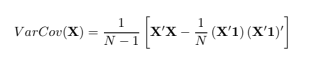

## Soluciones Varianza-Covarianza

### Solución 1

In [19]:
x_transpose = x.transpose()

In [20]:
temp1 = x_transpose.dot(x)

In [21]:
ones = np.ones((x_transpose.shape[1], 1))

In [22]:
temp2 = x_transpose.dot(ones)

In [23]:
temp3 = temp2.transpose()

In [24]:
temp4 = temp2.dot(temp3)

In [25]:
temp5 = temp4 / x.shape[0]

In [26]:
temp6 = temp1 - temp5

In [27]:
varcov = temp6 / (x.shape[0] - 1)

In [28]:
varcov

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


COMPROBACIÓN DE LA MATRIZ DE VARIANZA-COVARIANZA

In [29]:
x.cov()

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


### Solución 2

In [30]:
x_transpose = x.transpose()

In [31]:
n = len(x)

In [32]:
ones = np.ones((n,1))

In [33]:
xt = x_transpose.dot(ones)

In [34]:
xtx = x_transpose.dot(x)

In [35]:
xt1t = xt.transpose()

In [36]:
VarCov = (1/(n-1))*(xtx - (1/n)*(xt.dot(xt1t)) )

In [37]:
VarCov

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


COMPROBACIÓN DE LA MATRIZ DE VARIANZA-COVARIANZA

In [38]:
x.cov()

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


## Correlaciones

A PARTIR DE LAS DESVIACIONES ESTÁNDAR Y LA MATRIZ DE VARIANZA-COVARIANZA OBTENEMOS LAS CORRELACIONES.

In [39]:
varcov

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,0.008576,0.095351,-0.006378,-0.011938,0.004549
OPM,0.095351,266.685817,0.037558,0.087182,-0.580925
BtMr,-0.006378,0.037558,0.260931,0.086589,-0.023577
isSmall,-0.011938,0.087182,0.086589,0.223518,-0.106857
isMedium,0.004549,-0.580925,-0.023577,-0.106857,0.217431


In [40]:
var = np.array([])
for i in range(len(varcov)) :
  var = np.append(var, varcov.iloc[i,i])

In [41]:
vars = pd.DataFrame(var)
vars = vars.transpose()

In [42]:
vars.columns = ['EPSP','OPM','BtMr', 'isSmall', 'isMedium']

In [43]:
vars

,EPSP,OPM,BtMr,isSmall,isMedium
0,0.008576,266.685817,0.260931,0.223518,0.217431


In [44]:
stds = np.sqrt(var)

In [45]:
stds

array([ 0.09260701, 16.33051797,  0.51081429,  0.47277688,  0.46629533])

In [46]:
std_dev = [[ 0 for y in range( len(stds) ) ] for x in range( len(stds) )]
for i in range(len(stds)):
  for j in range(len(stds)):
    std_dev[i][j] = stds[i] * stds[j]

In [47]:
varcov2 = varcov.to_numpy()

In [48]:
corr = varcov2 / std_dev

In [49]:
corr

array([[ 1.        ,  0.0630495 , -0.1348371 , -0.27267741,  0.10534454],
       [ 0.0630495 ,  1.        ,  0.0045024 ,  0.01129204, -0.07628849],
       [-0.1348371 ,  0.0045024 ,  1.        ,  0.358543  , -0.09898189],
       [-0.27267741,  0.01129204,  0.358543  ,  1.        , -0.4847154 ],
       [ 0.10534454, -0.07628849, -0.09898189, -0.4847154 ,  1.        ]])

In [50]:
corr = pd.DataFrame(corr)

In [51]:
corr.columns = ['EPSP','OPM','BtMr', 'isSmall', 'isMedium']

In [52]:
corr = corr.transpose()
corr.columns = ['EPSP','OPM','BtMr', 'isSmall', 'isMedium']

In [53]:
corr

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,1.000000,0.063049,-0.134837,-0.272677,0.105345
OPM,0.063049,1.000000,0.004502,0.011292,-0.076288
BtMr,-0.134837,0.004502,1.000000,0.358543,-0.098982
isSmall,-0.272677,0.011292,0.358543,1.000000,-0.484715
isMedium,0.105345,-0.076288,-0.098982,-0.484715,1.000000


COMPROBACIÓN DE CORRELACIÓN

In [54]:
x.corr()

,EPSP,OPM,BtMr,isSmall,isMedium
EPSP,1.000000,0.063049,-0.134837,-0.272677,0.105345
OPM,0.063049,1.000000,0.004502,0.011292,-0.076288
BtMr,-0.134837,0.004502,1.000000,0.358543,-0.098982
isSmall,-0.272677,0.011292,0.358543,1.000000,-0.484715
isMedium,0.105345,-0.076288,-0.098982,-0.484715,1.000000


## Interpretación Correlaciones

PODEMOS OBSERVAR QUE LA MATRIZ DE CORRELACIÓN ES CORRECTA, SIENDO EL BOOK-TO-MARKET RATIO CON isSmall DE MANERA PROPORCIONAL e isSmall CON isMedium DE MANERA INVERSAMENTE PROPORCIONAL LAS QUE ESTÁN MÁS RELACIONADAS DE MANERA LINEAL.



# Modelo de regresión multiple 1

## Betas sin quitar leverage points grandes

OBTENCIÓN DE LAS BETAS

In [55]:
x['1'] = 1

In [56]:
x = x[['1', 'EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium']]

In [57]:
xt = x.transpose()

In [58]:
x2 = xt.dot(x)

In [59]:
xinv = np.linalg.inv(x2)

In [60]:
aux = np.dot(xinv, xt)

### LEVERAGE POINTS

OBTENEMOS LA HAT MATRIX DE LA FÓRMULA:

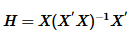

RECORDEMOS QUE LA DIAGONAL DE LA HAT MATRIX NOS DA LOS LEVERAGE POINTS.

In [61]:
H = x.dot(aux)

In [62]:
leverage = np.diag(H)

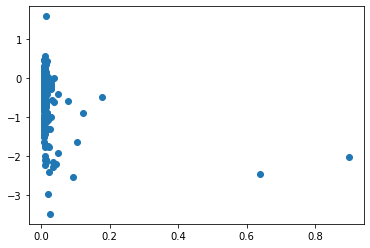

In [63]:
plt.scatter(leverage, y)

In [64]:
leverage_points = pd.DataFrame(leverage)
leverage_points.columns = ['leverage_points']

In [65]:
leverage_points.describe()

,leverage_points
count,343.000000
mean,0.017493
std,0.060164
min,0.008405
25%,0.008917
50%,0.009767
75%,0.011590
max,0.897394


COMO SE PUEDE VER EN LA GRÁFICA TENEMOS LEVERAGE POINTS DESTACABLES POR ENCIMA DE 0.6, SIENDO LA MEDIA DE A PENAS 0.017.

RECORDEMOS QUE SEGÚN LA LITERATURA, UNA DE LAS RELGAS PARA CONSIDERAR UN LEVERAGE POINT ALTO, ES QUE ESTE SEA 2 VECES MAYOR A LA MEDIA DE LEVERAGE.

ES DECIR, *(2k+2)/n*, DONDE: 
* k = number of predictors (5)
* n = number of observations (343)

POR LO TANTO SERÍA:

((2*5)+2)/343 = 0.03498542274052478 => cualquier número por encima de este es un high leverage.

LOS DATOS DESCRITOS ANTERIORMENTE SOBREPASAN LA REGLA, POR LO TANTO ESTOS SON LOS REGISTROS QUE PODEMOS DESCARTAR, ADEMÁS DE OTROS TANTOS QUE SALDRÁN AL APLICARSE LA MASCARA.

In [66]:
lp_mask = leverage_points.copy()
lp_mask2 = lp_mask['leverage_points'] <= 0.03498542274052478
lp_new = lp_mask[lp_mask2]

In [67]:
lp_new.describe()

,leverage_points
count,331.000000
mean,0.011099
std,0.004192
min,0.008405
25%,0.008882
50%,0.009745
75%,0.011374
max,0.034188


SE PUEDE VER QUE FUERON DESCARTADOS 12 REGISTROS Y EL VALOR MÁXIMO ESTÁ DENTRO DE ESE RANGO, FILTRAREMOS ESTOS DATOS PARA OBTENER LAS NUEVAS BETAS.

### BETAS

In [68]:
Betas = aux.dot(y)

In [69]:
Betas

array([-0.3211842 ,  3.05225513,  0.00723722, -0.019992  , -0.2170283 ,
       -0.13466137])

In [70]:
B = pd.DataFrame(Betas)
B = B.transpose()
B.columns = ['b','EPSP','OPM', 'BtMr', 'isSmall', 'isMedium']
B = B.transpose()

In [71]:
B

,0
b,-0.321184
EPSP,3.052255
OPM,0.007237
BtMr,-0.019992
isSmall,-0.217028
isMedium,-0.134661


## Predicción

In [72]:
import matplotlib.pyplot as plt

In [73]:
XB = x.dot(Betas)

In [74]:
ym = pd.DataFrame(y)

## MSE

In [75]:
y_pred = x * Betas

In [76]:
y_pred

,1,EPSP,OPM,BtMr,isSmall,isMedium
0,-0.321184,0.075348,0.000396,-0.010749,-0.000000,-0.134661
1,-0.321184,-0.000527,-0.000025,-0.000870,-0.000000,-0.000000
3,-0.321184,-0.089705,-0.002301,-0.014551,-0.000000,-0.134661
4,-0.321184,0.011684,0.000224,-0.004879,-0.000000,-0.000000
5,-0.321184,-0.038900,-0.002043,-0.004610,-0.000000,-0.134661
...,...,...,...,...,...,...
370,-0.321184,0.009406,0.000453,-0.001490,-0.000000,-0.134661
371,-0.321184,0.042707,0.001701,-0.003295,-0.000000,-0.000000
372,-0.321184,-0.009004,-0.002377,-0.000317,-0.000000,-0.000000
373,-0.321184,-0.812779,-0.000849,-0.008065,-0.217028,-0.000000


In [77]:
y_pred['sum'] = y_pred['1'] + y_pred['isSmall'] + y_pred['isMedium'] + y_pred['EPSP'] + y_pred['OPM'] + y_pred['BtMr']

In [78]:
y_pred

,1,EPSP,OPM,BtMr,isSmall,isMedium,sum
0,-0.321184,0.075348,0.000396,-0.010749,-0.000000,-0.134661,-0.390850
1,-0.321184,-0.000527,-0.000025,-0.000870,-0.000000,-0.000000,-0.322606
3,-0.321184,-0.089705,-0.002301,-0.014551,-0.000000,-0.134661,-0.562403
4,-0.321184,0.011684,0.000224,-0.004879,-0.000000,-0.000000,-0.314156
5,-0.321184,-0.038900,-0.002043,-0.004610,-0.000000,-0.134661,-0.501398
...,...,...,...,...,...,...,...
370,-0.321184,0.009406,0.000453,-0.001490,-0.000000,-0.134661,-0.447477
371,-0.321184,0.042707,0.001701,-0.003295,-0.000000,-0.000000,-0.280072
372,-0.321184,-0.009004,-0.002377,-0.000317,-0.000000,-0.000000,-0.332882
373,-0.321184,-0.812779,-0.000849,-0.008065,-0.217028,-0.000000,-1.359906


In [79]:
E = y - y_pred['sum']

In [80]:
aux = E * E

In [81]:
aux

0      0.146381
1      0.048054
3      2.047263
4      0.120854
5      0.747237
         ...   
370    0.005568
371    0.993166
372    0.001247
373    0.142802
374    4.351922
Length: 343, dtype: float64

In [82]:
MSE = aux.sum()/343

In [83]:
MSE

0.28578203477433484

## Multicolinealidad

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

    feature       VIF
0         1  3.054836
1      EPSP  1.087882
2       OPM  1.011299
3      BtMr  1.159081
4   isSmall  1.579139
5  isMedium  1.327638


TODAS LAS VARIABLES CUENTAN CON UN VIF MENOR O LIGERAMENTE CERCANO AL 1.5, POR LO QUE PODEMOS AFIRMAR QUE NO HAY MULTICOLINEALIDAD ENTRE LOS COEFICIENTES. ES DECIR, NO TIENEN CORRELACIÓN ENTRE SÍ, POR LO QUE SON APTAS PARA EL MODELO.

## Modelo

In [85]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [86]:
import seaborn as sns

model = sm.OLS(y, sm.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     28.39
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           5.17e-24
Time:                        20:42:15   Log-Likelihood:                -271.89
No. Observations:                 343   AIC:                             555.8
Df Residuals:                     337   BIC:                             578.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.3212      0.051     -6.310      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Leverage Points y Outliers

In [87]:
influence = model.get_influence()
inf_sum = influence.summary_frame()

print(inf_sum.head())

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

      dfb_1  dfb_EPSP   dfb_OPM  dfb_BtMr  dfb_isSmall  dfb_isMedium  \
0 -0.005127  0.010990  0.006591  0.019837    -0.004080      0.048246   
1 -0.038176  0.002060  0.000011  0.006984     0.022010      0.025183   
3  0.028254  0.045141 -0.026913 -0.130327     0.055456     -0.174891   
4  0.057001 -0.001109 -0.000205  0.003829    -0.039579     -0.041250   
5 -0.003635  0.014188 -0.016173  0.013271    -0.001639     -0.113427   

    cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
0  0.000878        0.713067  0.010255         0.072582       0.712546   
1  0.000244       -0.408239  0.008714        -0.038275      -0.407734   
3  0.014319       -2.668950  0.011917        -0.293106      -2.693607   
4  0.000595        0.647324  0.008442         0.059729       0.646765   
5  0.004101       -1.610387  0.009400        -0.156870      -1.614219   

     dffits  
0  0.072529  
1 -0.038227  
3 -0.295814  
4  0.059677  
5 -0.157243  


In [88]:
# Concatenación con la variable dependiente y (R)
from statsmodels.formula.api import ols

y_dep = pd.concat([ym.R, inf_sum], axis = 1)
y_dep =y_dep.rename(columns={'hat_diag': 'leverage'})
y_dep.head()

,R,dfb_1,dfb_EPSP,dfb_OPM,dfb_BtMr,dfb_isSmall,dfb_isMedium,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,-0.008253,-0.005127,0.010990,0.006591,0.019837,-0.004080,0.048246,0.000878,0.713067,0.010255,0.072582,0.712546,0.072529
1,-0.541818,-0.038176,0.002060,0.000011,0.006984,0.022010,0.025183,0.000244,-0.408239,0.008714,-0.038275,-0.407734,-0.038227
3,-1.993228,0.028254,0.045141,-0.026913,-0.130327,0.055456,-0.174891,0.014319,-2.668950,0.011917,-0.293106,-2.693607,-0.295814
4,0.033485,0.057001,-0.001109,-0.000205,0.003829,-0.039579,-0.041250,0.000595,0.647324,0.008442,0.059729,0.646765,0.059677
5,-1.365826,-0.003635,0.014188,-0.016173,0.013271,-0.001639,-0.113427,0.004101,-1.610387,0.009400,-0.156870,-1.614219,-0.157243


AQUÍ PODEMOS OBSERVAR LOS STUDENTIZED RESIDUALS, LOS COOK'S DISTANCES, LOS DFFITS Y LOS LEVERAGE POINTS 

Leverage vs. Studentized Residuals


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Studentized Residuals')

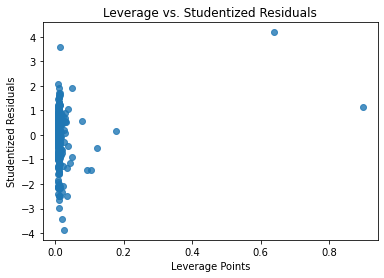

In [89]:
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage Points')
plt.ylabel('Studentized Residuals')

SE PUEDE OBSERVAR A TRAVÉS DE LAS FUNCIONES DEL MODELO QUE CONTAMOS CON LOS MISMOS LEVERAGE POINTS QUE CALCULAMOS ANTERIORMENTE.

### Studentized residuals y High Leverage

SE TOMARÁN COMO SIGNIFICATIVOS LOS STUDENTIZED RESIDUALS POR ENCIMA DE UN VALOR ABSOLUTO DE DOS DADA LA REGLA DE DEDO.

In [90]:
r = y_dep.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = y_dep.sort_values(by = 'student_resid')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print (r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())

------------------------------ studentized residual ------------------------------
count    343.000000
mean       0.015197
std        1.075901
min       -4.006977
25%       -0.510541
50%        0.167358
75%        0.619577
max        7.523692
Name: student_resid, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
            R     dfb_1  dfb_EPSP   dfb_OPM  dfb_BtMr  dfb_isSmall  \
374 -3.482115  0.030837  0.455051  0.136661 -0.225752    -0.054112   
320 -2.968117 -0.052714  0.309463 -0.030655  0.167515    -0.198714   
340 -2.096733 -0.010792  0.028411 -0.030785  0.041713    -0.008503   
3   -1.993228  0.028254  0.045141 -0.026913 -0.130327     0.055456   
324 -2.287815  0.007642  0.036636  0.396547 -0.049047     0.036521   

     dfb_isMedium   cooks_d  standard_resid  leverage  dffits_internal  \
374      0.046110  0.069765       -3.920361  0.026513        -0.646985   
320     -0.007959  0.036907       -3.447979  0.018286     

DENTRO DE LA COLUMNA STUDENT_RESID VEMOS QUE EFECTIVAMENTE CONTAMOS CON OUTLIERS SUPERIORES A 2.

In [91]:
print(y_dep.student_resid[abs(r) > 2])

3     -2.693607
16    -2.505488
24    -2.167345
53    -2.503242
55    -2.184484
90    -2.229402
131   -2.036217
180   -2.103830
189   -2.508806
199   -2.146711
231   -2.135734
240   -2.127422
251    2.079373
254   -2.140599
264   -2.089978
271    3.696073
299   -2.445627
301    3.610651
320   -3.505243
324   -2.544224
340   -3.005788
357    7.523692
359   -2.366271
374   -4.006977
Name: student_resid, dtype: float64


HASTA AHORA LLEVAMOS UN RECUENTO DE 24 OUTLIERS POR STUDENTIZED RESIDUALS. POSTERIORMENTE EVALUAREMOS LOS HIGH LEVERAGES.

In [92]:
# High leverage
# point with leverage = (2k+2)/n 
# k = number of predictors (5)
# n = number of observations (343)
#((2*5)+2)/343 = 0.03498542274052478 => cualquier número por encima de este es un high leverage
l = y_dep.leverage

print ('-'*30 + ' Leverage ' + '-'*30)
print (l.describe())
print ('\n')

l_sort = y_dep.sort_values(by = 'leverage', ascending = False)
print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (l_sort.head())

------------------------------ Leverage ------------------------------
count    343.000000
mean       0.017493
std        0.060164
min        0.008405
25%        0.008917
50%        0.009767
75%        0.011590
max        0.897394
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
            R     dfb_1  dfb_EPSP    dfb_OPM  dfb_BtMr  dfb_isSmall  \
301 -2.033554  0.011352  0.459036 -10.620345  0.097174    -0.208778   
357 -2.455893  0.369616 -9.934251   0.611111  0.343815    -1.733092   
10  -0.486448 -0.018091  0.010522  -0.000668  0.076089    -0.012729   
51  -0.903120 -0.047022  0.033817  -0.009897  0.196684    -0.060539   
229 -1.634162 -0.115756  0.088558  -0.011745  0.482865    -0.242234   

     dfb_isMedium    cooks_d  standard_resid  leverage  dffits_internal  \
301     -0.078342  18.348024        3.547847  0.897394        10.492290   
357     -0.297369  14.391415        6.970558  0.639916        

CON ESTO YA PODEMOS IDENTIFICAR Y FILTRAR CLARAMENTE LOS HIGH LEVERAGES.

In [93]:
# Leverage Point = (2k+2)/n = 0.03498542274052478
print(y_dep.leverage[abs(l) > ((2*5)+2)/343])

10     0.178662
12     0.092520
23     0.037219
25     0.079087
51     0.120727
114    0.035724
167    0.049843
229    0.104669
301    0.897394
306    0.048245
315    0.042280
357    0.639916
Name: leverage, dtype: float64


GRACIAS A LA REGLA DE DEDO QUE ESTABLECIMOS, SE PUEDE VER QUE TENEMOS 12 REGISTROS QUE CUENTAN CON UN HIGH LEVERAGES.

AHORA DADOS ESTOS DATOS, PODEMOS APRECIAR QUE HAY DATOS CON INFLUENCIA SIGNIFICATIVA, PUES PUEDEN SER TANTO OUTLIERS COMO HIGH LEVERAGES, AFECTANDO LA REGRESIÓN AL INFLUIR EN LOS COEFICIENTES.

In [138]:
# Valores que son outliers y high leverage
outlier = pd.DataFrame((y_dep.R[abs(r) > 2]))
leverage= pd.DataFrame((y_dep.R[abs(l) > ((2*5)+2)/343]))

Influential=pd.merge(outlier,leverage, left_index=True, right_index=True)
print(Influential)

          R_x       R_y
301 -2.033554 -2.033554
357 -2.455893 -2.455893


ESTOS SON LOS REGISTROS MÁS INFLUYENTES AL SER TANTO OUTLIERS COMO HIGH LEVERAGES.

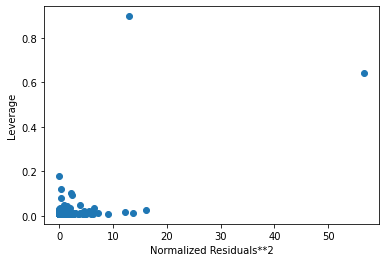

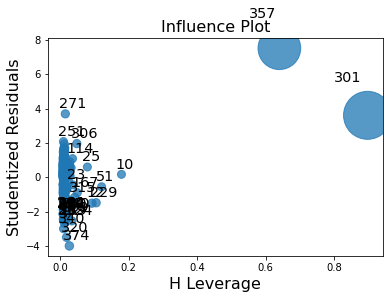

In [95]:
# Se usa el cuadrado de los residuos para facilitar la visualización

from statsmodels.graphics.regressionplots import *
#plot_leverage_resid2(lm)
#plt.show()

plt.scatter(y_dep.student_resid ** 2, y_dep.leverage)
#for i, state in enumerate(ym.R):
#  plt.annotate(state, [(y_dep.student_resid ** 2)[i],  y_dep.leverage[i]])
plt.xlabel("Normalized Residuals**2")
plt.ylabel("Leverage")
plt.show()

influence_plot(model)
plt.show()

NUEVAMENTE COMPROBAMOS QUE LOS DOS REGISTROS ANTERIORES CON:
* 0.897394 Y 0.639916 DE LEVERAGE RESPECTIVAMENTE
* 3.610651 Y 7.523692 DE STUDENTIZED RESIDUAL

SON AQUELLOS CON MAYOR INFLUENCIA EN NUESTRO MODELO, AFECTANDO EN GRAN MEDIDA NUESTROS COEFICIENTES.

### DFFITS

AHORA EVALUAREMOS DFITS PARA IDENTIFICAR OBSERVACIONES INFLUENCIABLES EN EL MODELO, UTILIZANDO COMO VALOR LÍMITE:

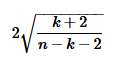

In [137]:
# 2*sqrt(k/n) = 0.2414726442081476
import math
y_dep[abs(y_dep.dffits) > 2 * math.sqrt((5+2)/(343-5-2))]

,R,dfb_1,dfb_EPSP,dfb_OPM,dfb_BtMr,dfb_isSmall,dfb_isMedium,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
3,-1.993228,0.028254,0.045141,-0.026913,-0.130327,0.055456,-0.174891,0.014319,-2.668950,0.011917,-0.293106,-2.693607,-0.295814
12,-2.532203,-0.028303,0.119359,0.426900,0.089272,-0.087089,0.030120,0.038844,-1.511961,0.092520,-0.482770,-1.514863,-0.483696
189,-2.099761,0.045055,0.017024,-0.005106,-0.197856,-0.080163,0.018205,0.015646,-2.489329,0.014923,-0.306396,-2.508806,-0.308793
229,-1.634162,-0.115756,0.088558,-0.011745,0.482865,-0.242234,-0.042255,0.043108,-1.487439,0.104669,-0.508577,-1.490130,-0.509497
240,-2.394958,0.010751,0.224408,-0.000374,-0.090572,-0.044690,0.015368,0.016604,-2.116379,0.021759,-0.315637,-2.127422,-0.317284
271,1.591808,0.019598,0.249152,-0.001624,-0.133625,0.331607,0.019986,0.032676,3.628540,0.014672,0.442779,3.696073,0.451020
301,-2.033554,0.011352,0.459036,-10.620345,0.097174,-0.208778,-0.078342,18.348024,3.547847,0.897394,10.492290,3.610651,10.678025
306,-0.400478,0.075186,-0.310406,0.028705,-0.264358,0.139805,0.016620,0.032276,1.954570,0.048245,0.440061,1.962825,0.441919
320,-2.968117,-0.052714,0.309463,-0.030655,0.167515,-0.198714,-0.007959,0.036907,-3.447979,0.018286,-0.470579,-3.505243,-0.478395
324,-2.287815,0.007642,0.036636,0.396547,-0.049047,0.036521,-0.140018,0.036891,-2.523813,0.033583,-0.470475,-2.544224,-0.474280


USUALMENTE MIENTRAS MÁS CERCANO SEA A 0 SU VALOR DE DFFITS, MENOS INFLUENCIABLE SERÁ LA OBSERVACIÓN EN EL MODELO. LA MAYORÍA ESTAN RONDANDO EL CERO, EXCEPTO LOS ÍNDICES 301 Y 357. LAS MISMAS OBSERVACIONES QUE DETECTAMOS CON ANTERIORIDAD.

### Cook's Distance

PARA EVALUAR COOK'S DISTANCE SE ESTABLECE COMO VALOR LÍMITE EL TRIPLE DE LA MEDIA DE COOK'S DISTANCE PARA ESTABLECER VALORES INFLUENCIABLES.

In [97]:
limit = (y_dep.loc[:,"cooks_d"].mean())*3
outlier2 = pd.DataFrame((y_dep.R[abs(y_dep.cooks_d) > limit]))
print(outlier2)

            R
301 -2.033554
357 -2.455893


SEGUIMOS CONSERVANDO LOS MISMOS DOS REGISTROS COMO VALORES INFLUENCIABLES.

# Modelo de regresión multiple 2

AHORA QUE YA TENEMOS TODOS LOS VALORES INFLUENCIABLES, ASÍ COMO LOS OUTLIERS. PODEMOS REALIZAR NUESTRO SEGUNDO MODELO MEJORADO SIN ESTOS VALORES QUE AFECTAN LOS COEFICIENTES.

In [98]:
# Removemos valores influenciables y outliers
X_NM = x.copy()
Y_NM = ym.copy()

X_NM = X_NM.drop([3, 16, 24, 53, 55, 90, 131, 180, 189, 199, 231, 240, 251, 254, 264, 271, 299, 301, 320, 324, 340, 357, 359, 374])
Y_NM = Y_NM.drop([3, 16, 24, 53, 55, 90, 131, 180, 189, 199, 231, 240, 251, 254, 264, 271, 299, 301, 320, 324, 340, 357, 359, 374])

## Betas

OBTENCIÓN DE LAS BETAS

In [99]:
x = X_NM[['1', 'EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium']]

In [100]:
xt = x.transpose()

In [101]:
x2 = xt.dot(x)

In [102]:
xinv = np.linalg.inv(x2)

In [103]:
aux = np.dot(xinv, xt)

In [104]:
Betas = aux.dot(Y_NM)

In [105]:
Betas

array([[-0.28231886],
       [ 4.41658237],
       [ 0.01584424],
       [-0.01429631],
       [-0.14091656],
       [-0.10394451]])

In [106]:
B = pd.DataFrame(Betas)
B = B.transpose()
B.columns = ['b','EPSP','OPM', 'BtMr', 'isSmall', 'isMedium']
B = B.transpose()

In [107]:
B

,0
b,-0.282319
EPSP,4.416582
OPM,0.015844
BtMr,-0.014296
isSmall,-0.140917
isMedium,-0.103945


## Modelo

In [108]:
model2 = sm.OLS(Y_NM, sm.add_constant(X_NM)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     34.59
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           4.07e-28
Time:                        20:42:17   Log-Likelihood:                -150.68
No. Observations:                 319   AIC:                             313.4
Df Residuals:                     313   BIC:                             335.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.2823      0.038     -7.458      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


PASAMOS DE UNA R2 DE 0.296 A 0.356, SIENDO UNA MEJORÍA DEL 20.27%

# Modelo de regresión multiple 3

EVALUAREMOS IGUALMENTE EL CASO DONDE SOLO ELIMINAMOS LOS DATOS INFLUENCABLES.

In [115]:
x = temp[['EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium']]
y = temp['R']
# Removemos valores influenciables
X_NM2 = x.copy()
Y_NM2 = ym.copy()

X_NM2 = X_NM2.drop([301, 357])
Y_NM2 = Y_NM2.drop([301, 357])

## Betas

OBTENCIÓN DE LAS BETAS

In [117]:
X_NM2['1'] = 1

In [118]:
x = X_NM2[['1', 'EPSP', 'OPM', 'BtMr', 'isSmall', 'isMedium']]

In [119]:
xt = x.transpose()

In [120]:
x2 = xt.dot(x)

In [121]:
xinv = np.linalg.inv(x2)

In [122]:
aux = np.dot(xinv, xt)

In [123]:
Betas = aux.dot(Y_NM2)

In [124]:
Betas

array([[-0.33807545],
       [ 5.80300809],
       [ 0.01987908],
       [-0.04276348],
       [-0.08780651],
       [-0.11186333]])

In [125]:
B = pd.DataFrame(Betas)
B = B.transpose()
B.columns = ['b','EPSP','OPM', 'BtMr', 'isSmall', 'isMedium']
B = B.transpose()

In [126]:
B

,0
b,-0.338075
EPSP,5.803008
OPM,0.019879
BtMr,-0.042763
isSmall,-0.087807
isMedium,-0.111863


## Modelo

SE PUEDE VER COMO LAS BETAS CALCULADAS POR ÁLGEBRA MATRICIAL SON LAS MISMAS QUE LAS CALCULADAS POR FUNCIONES DE PYTHON, POR LO QUE SE PUEDE COMPROBAR QUE LOS CÁLCULOS FUERON HECHOS DE MANERA ADECUADA.

In [127]:
model3 = sm.OLS(Y_NM2, sm.add_constant(X_NM2)).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     41.73
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.39e-33
Time:                        20:53:43   Log-Likelihood:                -240.87
No. Observations:                 341   AIC:                             493.7
Df Residuals:                     335   BIC:                             516.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EPSP           5.8030      0.509     11.409      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


PASAMOS DE UNA R2 DE 0.356 A 0.384, SIENDO UNA MEJORÍA DEL 7.86% RESPECTO AL MODELO ANTERIOR Y DE UN 29.73% RESPECTO AL MODELO ORIGINAL.

DE TODOS LOS MODELOS REALIZADOS PODEMOS CONCLUIR QUE AQUEL DONDE ELIMINAMOS ÚNICAMENTE LOS VALORES INFLUENCIABLES ES EL QUE CUENTA CON UN MEJOR RENDIMIENTO.

NUVEMANTE COMPROBANDO LO MUCHO QUE PUEDEN VERSE AFECTADOS LOS COEFICIENTES ANTE VALORES MUY GRANDES DE LEVERAGES Y OUTLIERS, ASÍ COMO DEMOSTRAMOS LA IMPORTANCIA DEL ANÁLISIS ADECUADO DE ESTAS MÉTRICAS PARA LLEGAR A RESULTADOS FAVORABLES.